In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind

# YouTube Statistics: How do major YouTube statistics influence each other?

Some terms that we will use in this document:

- **Average views/video:** The average number of views a video on a particular channel gets. Calculated via $\frac{View Count}{Video Count}$
- **Outreach:** A measure of how much a channel's content extends beyond its subscriber base. Calculated via $\frac{View Count}{Subscriber Count}$
- **Community Score:** A measure of how a channel's community size compares to the amount of content on the channel. Calculated via $\frac{Subscriber Count}{Video Count}$

In [44]:
channels = pd.read_csv("channel_data.csv")
channels['avgViews'] = channels['View Count'] / channels['Video Count']
channels['outreach'] = channels['View Count'] / channels['Subscriber Count']
channels['communityScore'] = channels['Subscriber Count'] / channels['Video Count']
channels.replace([np.inf, -np.inf], np.nan, inplace=True)
channels.dropna(inplace=True)
channels

,Title,View Count,Subscriber Count,Video Count,avgViews,outreach,communityScore
0,YouTube TV,16561757,369000,80,2.070220e+05,44.882810,4612.500000
1,Talent Recap,6462549813,13000000,5478,1.179728e+06,497.119216,2373.128879
2,Love YourSelf,475384601,1560000,1817,2.616316e+05,304.733719,858.558063
3,Real Engineering,461006113,4210000,185,2.491925e+06,109.502640,22756.756757
4,Leo - Topic,35957,143,3,1.198567e+04,251.447552,47.666667
...,...,...,...,...,...,...,...
207,McCormick Spice,123137442,136000,359,3.430012e+05,905.422368,378.830084
208,Queen Radio,1260445,20700,186,6.776586e+03,60.891063,111.290323
209,sabtuahad,3638039,3280,76,4.786893e+04,1109.158232,43.157895
210,Hollywood Action,56588925,208000,23,2.460388e+06,272.062139,9043.478261


## Part 1: The Relationship Between Average Views/Video and Subscriber Count

The most obvious correlation to examine is that of average views per video and subscriber count. If channels with more subscribers do not average more views than channels with less subscribers, than getting more subscribers is not a meaningful way of maximizing a creator's revenue on the platform. If channels with more subscribers **do** average more views than channels with less subscribers, then trying to get more subscribers is a meaningful way of growing as a creator and making more money on the platform. To examine this relationship, we will first separate our dataset into "small" creators and "large" creators. This will simply be the creators with subscriber count below and above the median respectively. Then, we will plot the distributions of the average views per video, and compare them to see similarities and differences.

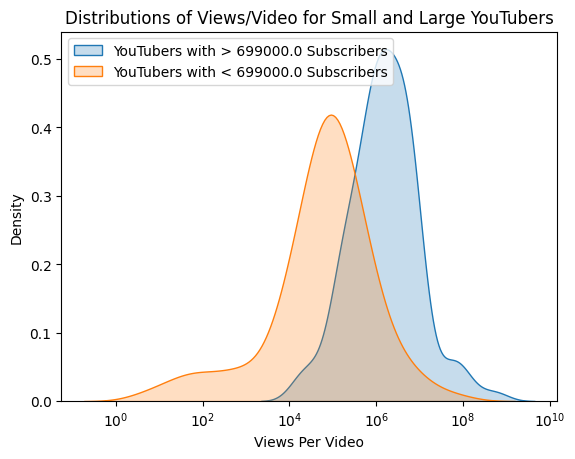

'T-test p-value: 0.06031670869392894'

'Median Views/Video for Small Creators: 78638.1170212766'

'Median Views/Video for Large Creators: 1474925.54845815'

In [45]:
cutoff = channels['Subscriber Count'].median()
small = channels[channels['Subscriber Count'] < cutoff].reset_index()
large = channels[channels['Subscriber Count'] > cutoff].reset_index()

isLog = True
sns.kdeplot(data=large, x='avgViews',log_scale=isLog, fill=True)
sns.kdeplot(data=small, x='avgViews',log_scale=isLog, fill=True)
if not isLog:
    plt.xlim([0,1e8])
plt.title("Distributions of Views/Video for Small and Large YouTubers")
plt.xlabel("Views Per Video")
plt.legend(labels=[f'YouTubers with > {cutoff} Subscribers',f'YouTubers with < {cutoff} Subscribers'], loc='upper left')
plt.show()

result = stats.ttest_ind(large['avgViews'],small['avgViews'])
display(f"T-test p-value: {result.pvalue}")
display(f"Median Views/Video for Small Creators: {small['avgViews'].median()}")
display(f"Median Views/Video for Large Creators: {large['avgViews'].median()}")


The plots above show that there is a difference in the distributions of views per video for small and large creators. This, combined with the large difference in the median views per video for the two populations supports the claim that there is a significant difference in the average views per video of large creators and the average views per video of small creators. This is claim is further supported by a small p-value of 0.06, which though not technically statistically significant helps lend further credibility to the claim that large creators get more views per video than small creators. To further support this idea, we can plot average views/video against subscribers to attempt to find a correlation.

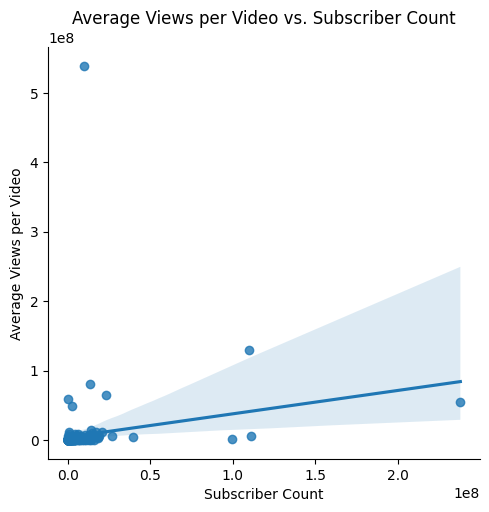

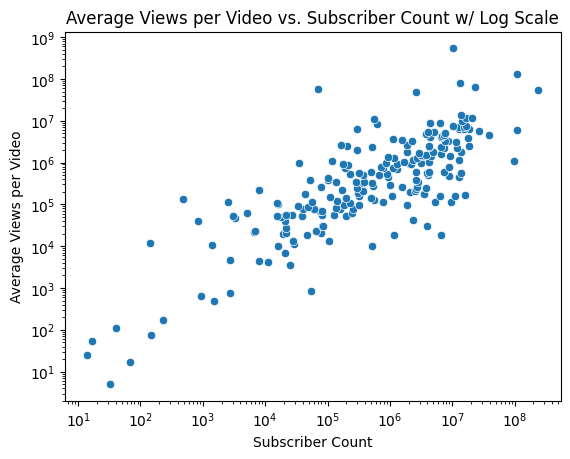

'Correlation Coefficient: 0.1807536553068286'

'p-value: 0.008654830153107836'

'Largest # of Subs: 40    MrBeast\nName: Title, dtype: object'

'Largest # of Views/Video: 30    Kanye West\nName: Title, dtype: object'

In [46]:
sns.lmplot(data=channels, x='Subscriber Count', y='avgViews')
plt.title("Average Views per Video vs. Subscriber Count")
plt.xlabel("Subscriber Count")
plt.ylabel("Average Views per Video")
plt.show()
channels.sort_values(by='avgViews', inplace=True)

sns.scatterplot(data=channels, x='Subscriber Count', y='avgViews')
plt.title("Average Views per Video vs. Subscriber Count w/ Log Scale")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Subscriber Count")
plt.ylabel("Average Views per Video")
plt.show()

result = stats.pearsonr(x=channels['Subscriber Count'], y=channels['avgViews'])
display(f"Correlation Coefficient: {result.statistic}")
display(f"p-value: {result.pvalue}")
display(f"Largest # of Subs: {channels[channels['Subscriber Count'] == channels['Subscriber Count'].max()].Title}")
display(f"Largest # of Views/Video: {channels[channels['avgViews'] == channels['avgViews'].max()].Title}")

The plot above shows that there is a positive correlation between average views per video and subscriber count. This makes sense because the more subscribers a channel has, the more people will be regularly consuming their content, and as a result their average views per video will increase. The p-value obtained by our Pearson test further supports this idea, allowing us to reject the null hypothesis. However, notice the channels with a low subscriber amount that have an enormous amount of views per video. These outliers are popular musicians, who unlike content creators have a small amount of videos. Each music video they post tends to go viral, and so their views per video are very high. Between the distribution plot showing us a significant difference in small and large creator's average views/video and the scatterplot showing us a positive correlation between average views/video and subscriber count, we claim that creators with more subscribers get more views than creators with less subscribers. We also claim that to maximize average views per video on a YouTube channel, it is a good idea to gain more subscribers.

## Part 2: Subscribers vs. Video Count

Is the number of subscribers to a YouTube channel proportional to the number of videos that channel has uploaded? If the two are strongly correlated, then a good strategy to grow a YouTube channel would be to churn out a large quantity of videos. If they are weakly correlated or not correlated, it may not be so important for creators to be putting out a large quantity of videos. Determining whether subscriber count is correlated to total number of videos uploaded can help content creators to formulate a strategy to maximize their channel growth. 

'Corellation coefficient: 0.08899168735733874'

'p-value: 0.19897940975507503'

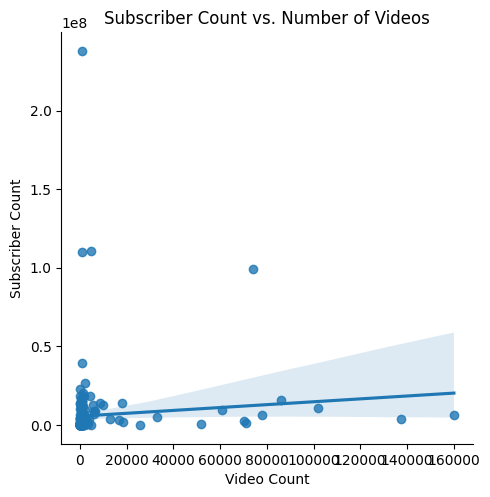

In [47]:
sns.lmplot(data=channels, x="Video Count", y="Subscriber Count")
plt.title("Subscriber Count vs. Number of Videos")
result = stats.pearsonr(x=channels['Video Count'], y=channels["Subscriber Count"])

display(f"Corellation coefficient: {result.statistic}")
display(f"p-value: {result.pvalue}")


The plot above suggests that there *may* be a weak correlation between the total number of videos a channel puts out and its subscriber count. The p-value obtained by a pearson test is 0.19, which says that this result is not statistically significant. This tells us that having more videos does not necessarily correspond to having more subscribers, and as such quantity of videos is not a reliable way to grow a YouTube channel.

## Part 3: Outreach vs. Video Count

Does uploading more videos help a YouTuber's content reach audiences outside their subscriber base? To determine this, we will plot channel's outreach against their video count and see if there is a correlation.

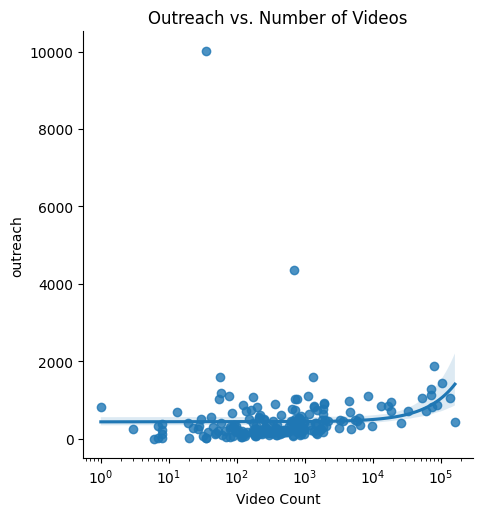

'Correlation Coefficient: 0.15705690128552716'

'p-value: 0.022814141504506037'

In [48]:
sns.lmplot(data=channels, x='Video Count', y='outreach')
plt.xscale('log')
plt.title('Outreach vs. Number of Videos')
plt.show()
result = stats.pearsonr(channels['Video Count'], y=channels['outreach'])
display(f"Correlation Coefficient: {result.statistic}")
display(f"p-value: {result.pvalue}")

The plot above shows an upward trend in outreach as video count increases. In other words, the plot suggests a positive correlation between video count and outreach. This makes sense from a probabilistic standpoint because the more videos a creator has, the more likely it is that there will be a video which reaches new audiences. The p-value of 0.02 obtained by the Pearson test supports the claim that a channel's outreach is positively correlated with the total number of videos on that channel. From this, we can say that if you want to reach a broader audience on YouTube, put out more videos.

## Part 4: Total Views vs. Community Score

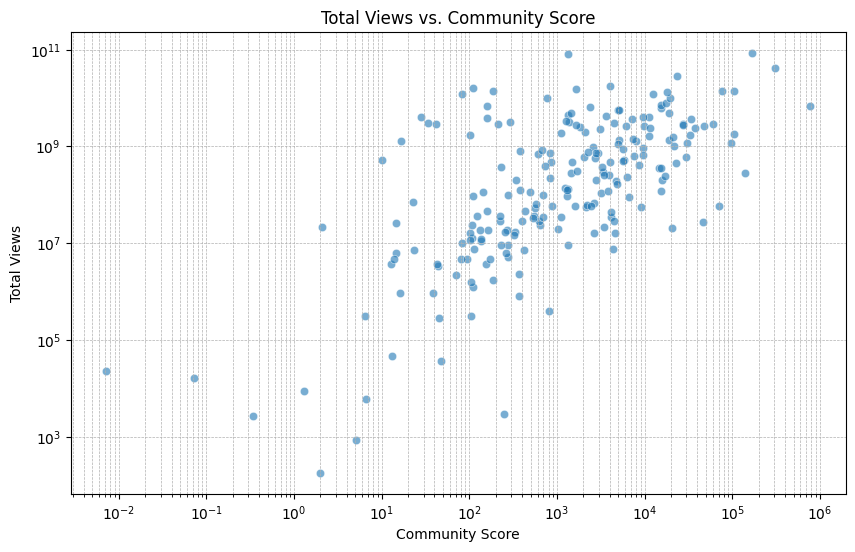

Correlation Coefficient: 0.26520296557276557
p-value: 0.00010020124489310052


In [49]:
channels['Community Score'] = channels['Subscriber Count'] / channels['Video Count']

# Plotting Total Views vs. Community Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=channels, x='Community Score', y='View Count', alpha=0.6)
plt.title('Total Views vs. Community Score')
plt.xlabel('Community Score')
plt.ylabel('Total Views')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

from scipy.stats import pearsonr
corr_coefficient, p_value = pearsonr(channels['Community Score'], channels['View Count'])
print(f"Correlation Coefficient: {corr_coefficient}")
print(f"p-value: {p_value}")

The plot shows that there is a significant possitive correlation between a channel's community score and the its view count. This indicates that channels with a higher subscriber to video ratio, are associated with higher views. This suggests that if subscribers aren't overwhelmed by too many videos, they achieve higher viewership

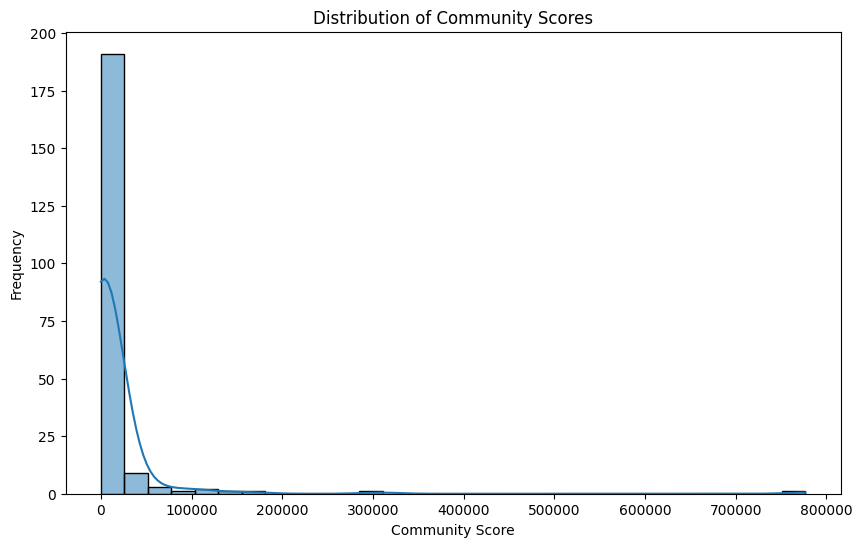

In [50]:
# Histogram of Community Scores
plt.figure(figsize=(10, 6))
sns.histplot(channels['Community Score'], kde=True, bins=30)
plt.title('Distribution of Community Scores')
plt.xlabel('Community Score')
plt.ylabel('Frequency')
plt.show()


In [51]:
median_score = channels['Community Score'].median()
low_community_score = channels[channels['Community Score'] <= median_score]
high_community_score = channels[channels['Community Score'] > median_score]

t_stat, p_val = ttest_ind(low_community_score['View Count'], high_community_score['View Count'])

print(f"T-test results — Statistic: {t_stat}, p-value: {p_val}")

T-test results — Statistic: -2.9084560036645244, p-value: 0.004026580062363448


The histogram shows a right-skewed distribution, suggesting that most channels have a larger number of videos that is relative to their subscribers, hence lower community scores. Few channels achieve these high community scores. There is a near-significant p-0value which hints that channels iwth a healtheir community have more views. 